# Introduction

In recent years, we have witnessed a significant increase in the number of natural disasters, largely driven by climate change. Events such as wildfires, hurricanes, floods, and droughts are occurring more frequently and with greater severity, causing extensive economic damage and loss of life. The escalating frequency and intensity of these events necessitate urgent attention and proactive measures to mitigate their impacts.

**Wildfires: A Growing Threat**

Among the various natural disasters, wildfires have become particularly concerning due to their destructive potential and widespread occurrence. In 2023, severe wildfires in British Columbia and Alberta burned over 17 million hectares of land. These fires led to mass evacuations, significant air quality issues, and substantial economic losses across North America.

Similarly, in 2024, Australia experienced devastating wildfires that caused widespread destruction. These fires not only led to the loss of property and lives but also severely affected the local ecology and wildlife. The increased frequency and severity of such events are a clear indication of the urgent need for improved prediction and preparedness strategies.

**The Urgent Need for Improved Prediction**

The recent wildfires underscore the critical need for enhanced wildfire prediction and preparedness strategies. Effective prediction can provide early warnings, allowing for timely evacuations and better resource allocation to combat fires. This can significantly reduce the loss of life, property, and ecological damage.

Wildfire prediction is inherently complex due to the interplay of various factors such as weather conditions, vegetation types, and human activities. Traditional prediction methods often fall short in capturing these complexities, leading to inaccurate forecasts and inadequate preparedness.

**Our Approach: Leveraging Advanced Technologies**

Recognizing these challenges, our group decided to focus on developing advanced wildfire prediction models. Our aim is to leverage state-of-the-art algorithms and deep learning techniques to enhance the accuracy and timeliness of wildfire forecasts. By using a data-driven approach, we can better understand the complex spatiotemporal interactions that influence wildfire behavior.

#Literature Review

**Literature Review and Model Comparison**

In our study, we build upon existing research to develop and validate advanced wildfire prediction models. Several key papers have informed our approach, providing a foundation for our methodology.

**Seasonal Fire Prediction using Spatio-Temporal Deep Neural Networks**

Michail et al. (n.d.) conducted a comprehensive study on seasonal fire prediction using spatio-temporal deep neural networks. Their research primarily focused on utilizing deep neural networks (DNNs) with spatio-temporal inputs. By incorporating both spatial and temporal data, they aimed to capture the complex interactions between various fire drivers such as atmospheric conditions, climatological factors, and vegetation variables. Their deep learning approach demonstrated significant improvements in the accuracy of wildfire predictions, emphasizing the importance of integrating spatio-temporal dynamics in modeling.

**Deep Learning for Global Wildfire Forecasting**

Prapas et al. (n.d.) explored the use of deep learning for global wildfire forecasting. They employed several deep learning models, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs), to predict wildfire occurrences and burned areas on a global scale. Their models leveraged large datasets to identify patterns and trends, demonstrating the powerful capabilities of deep learning in capturing the intricate relationships between various wildfire drivers. The study highlighted the potential of these advanced models to provide accurate short-term and long-term wildfire forecasts.

**Our Approach**

In our research, we have expanded upon the findings of Michail et al. and Prapas et al. by implementing and evaluating a diverse set of models to predict wildfire occurrences. Our objective is to compare the effectiveness of multiple algorithms, aiming to identify the most reliable predictors of wildfires. The models we have utilized include:

1. **Logistic Regression (L1, L2):**
   - **L1 Regularization:** Also known as Lasso regression, this technique helps in feature selection by forcing some coefficients to be exactly zero, thereby removing less important features.
   - **L2 Regularization:** Also known as Ridge regression, this technique penalizes the magnitude of coefficients to prevent overfitting by distributing error across all terms.

2. **Long Short-Term Memory (LSTM):**
   - LSTM networks are a type of recurrent neural network (RNN) that are particularly well-suited for time series data. They are designed to remember long-term dependencies, making them ideal for capturing temporal patterns in wildfire data.

3. **Random Forest:**
   - This ensemble learning method combines multiple decision trees to improve predictive performance. Random forests are robust to overfitting and can handle a large number of input variables, making them suitable for complex datasets.

4. **Feed Forward Neural Network:**
   - A basic type of neural network where connections between the nodes do not form a cycle. This model is used for various prediction tasks and can be adjusted in complexity by varying the number of layers and nodes.

**Comparison and Evaluation**

- **Michail et al.:** Focused on spatio-temporal deep neural networks (DNNs), emphasizing the integration of spatial and temporal data to improve wildfire prediction accuracy.
- **Prapas et al.:** Utilized CNNs and RNNs to analyze global wildfire data, leveraging the strength of deep learning models in pattern recognition and temporal data analysis.
- **Our Research:** We expanded the scope by comparing traditional and advanced machine learning models. Logistic regression (L1, L2) provides a baseline with regularization techniques to manage feature selection and overfitting. LSTM networks specifically address temporal dependencies in wildfire data, while random forests offer robustness against overfitting and the ability to handle diverse inputs. Feed forward neural networks provide a flexible framework for various prediction tasks.

Our comprehensive approach aims to evaluate the performance of these diverse models to determine the most effective predictors for wildfire occurrences, thereby enhancing the accuracy and reliability of our wildfire forecasting system.




#Data

**The SeasFire Cube: A Comprehensive Tool for Seasonal Fire Forecasting**

The SeasFire Cube is a scientific datacube designed for seasonal fire forecasting around the globe, funded by the European Space Agency (ESA). This advanced tool integrates spatial and temporal data to provide detailed insights into wildfire patterns and drivers.

**Spatial-Temporal Data Integration**

The SeasFire Cube incorporates both spatial and temporal components:
- **Spatial Component:** Provides detailed information about the geographical locations of wildfires, enabling precise mapping and analysis of fire-affected areas.
- **Temporal Component:** Captures the timing and duration of wildfire events, allowing for the study of fire seasonality and trends over time.

**Data Characteristics and Resolution**

The SeasFire Cube contains 21 years of data, spanning from 2001 to 2021. The data is organized with an 8-day time resolution and a 0.25-degree grid resolution, providing a granular and high-resolution dataset for analysis.

**Diverse Range of Fire Drivers**

The dataset includes a wide range of seasonal fire drivers, encompassing:
- **Atmospheric and Climatological Variables:** Factors such as temperature, humidity, and wind patterns.
- **Vegetation Variables:** Information on vegetation type, density, and moisture content.
- **Socioeconomic Variables:** Data on human activities and land use that influence fire occurrence.
- **Target Variables Related to Wildfires:** Key indicators such as burned areas, fire radiative power, and wildfire-related CO2 emissions.

**Utilization of Predictive Variables**

In our analysis, we utilized 10 different variables selected based on their relevance and usage in burned area prediction tasks from existing literature. These variables were standardized before use, except for the cube coordinates.

**Positional Encoding**

To enhance the predictive power of our models, we incorporated simple positional encodings. This was achieved by augmenting the feature vector with the actual cube coordinates, specifically using the sine and cosine of latitude and longitude. This method allows our models to better account for geographical variations and improve the accuracy of wildfire predictions.


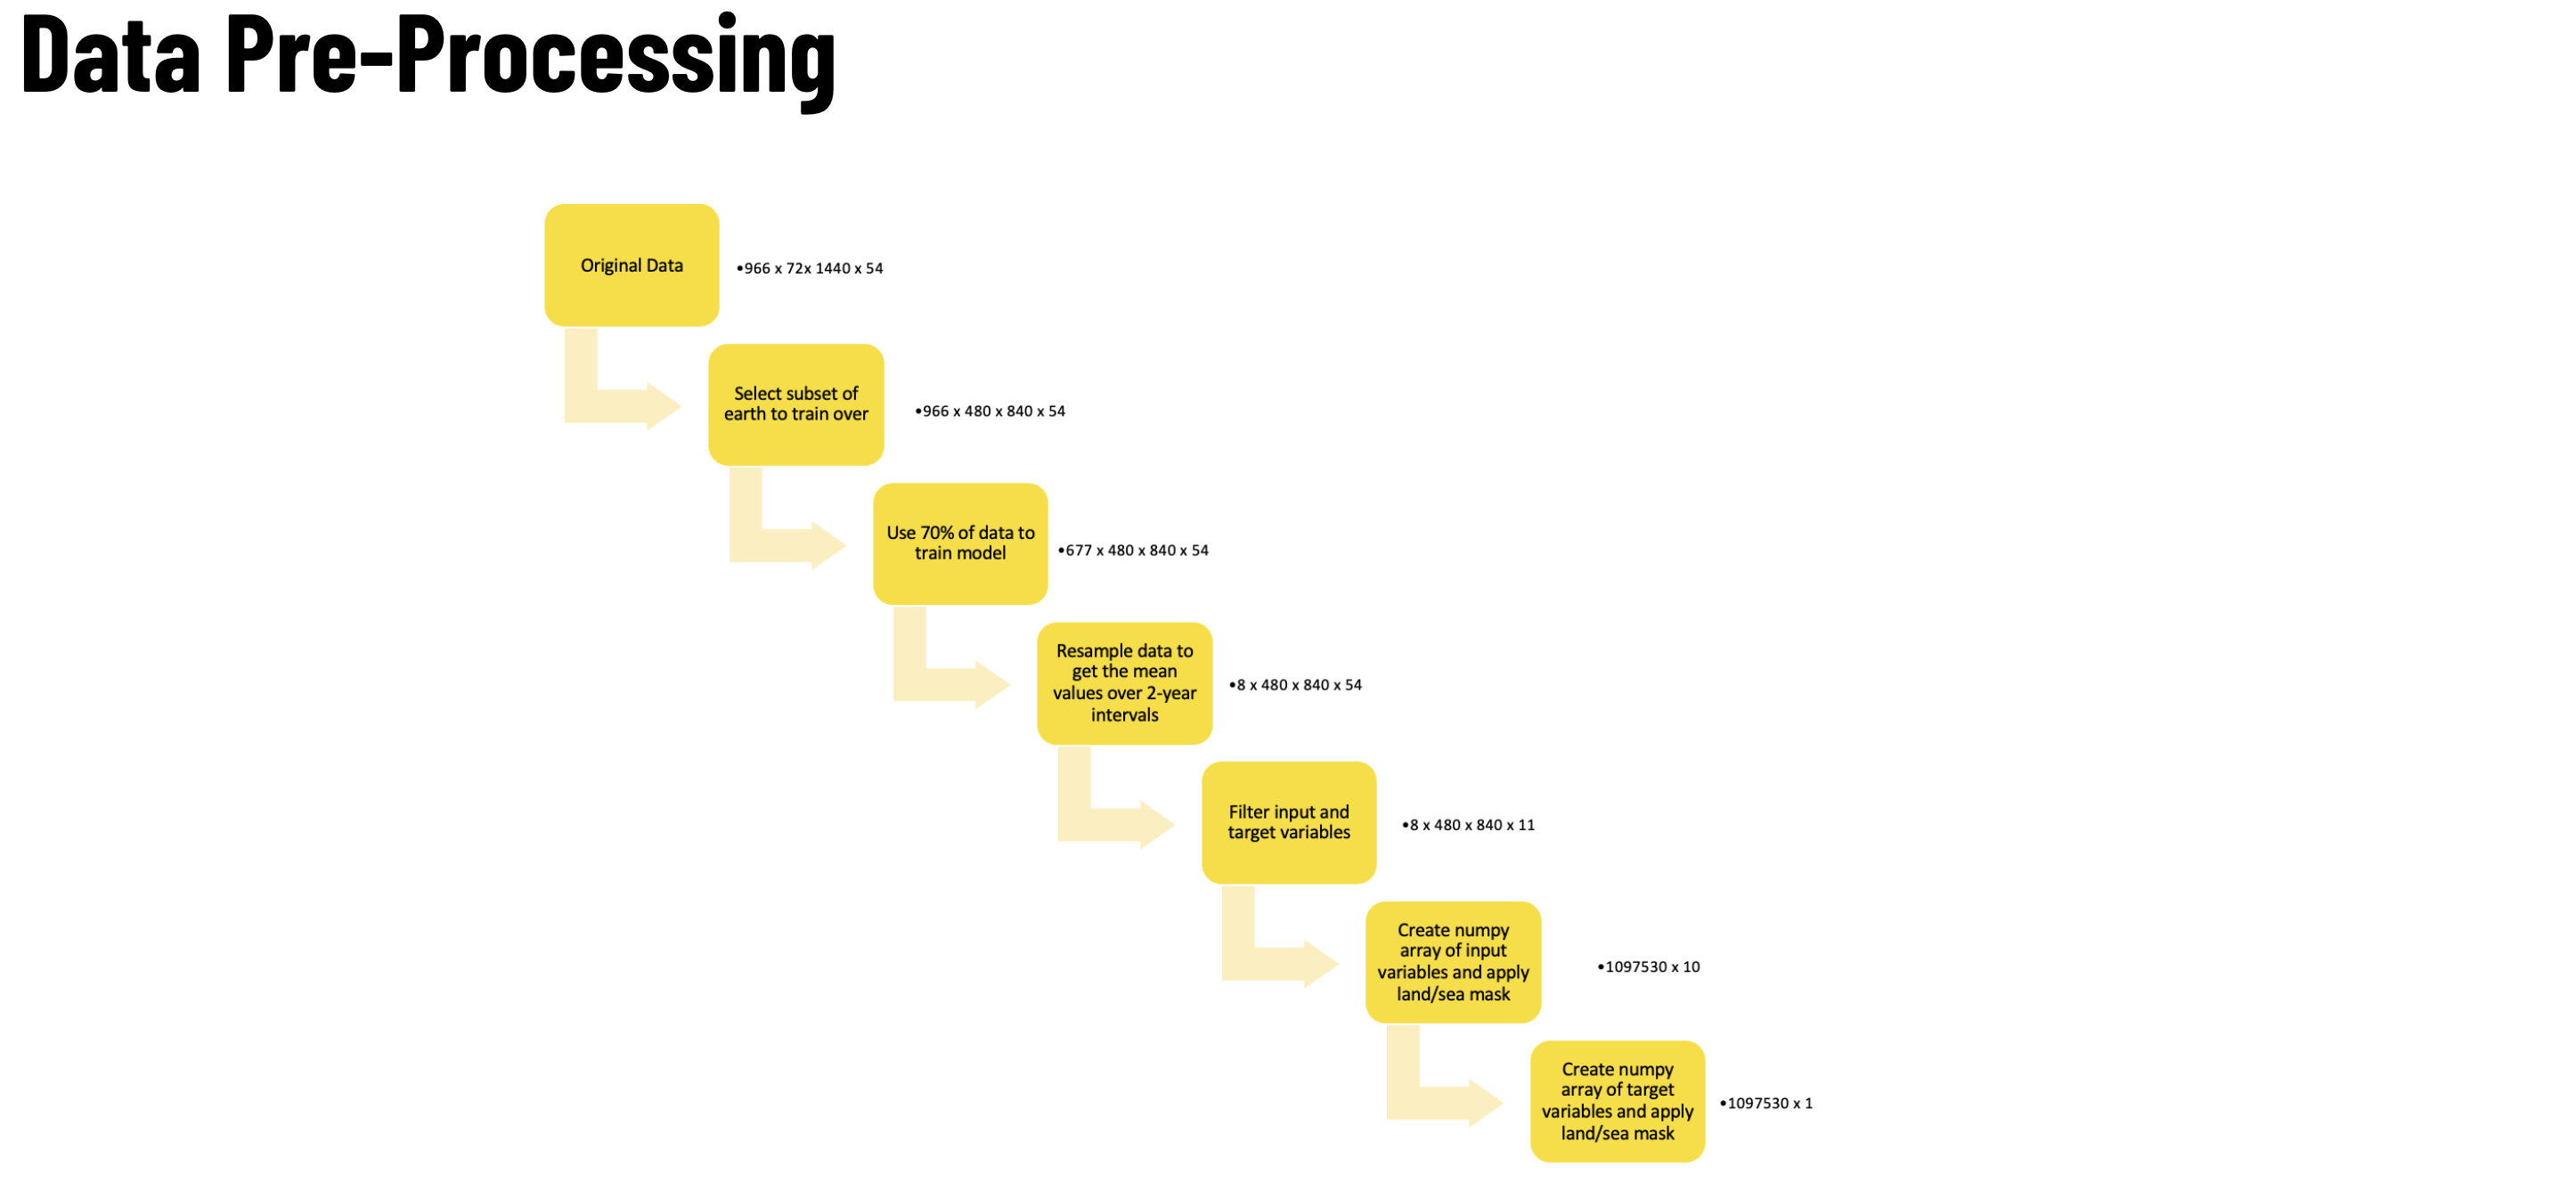

In [ ]:
import xarray as xr
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import joblib
import tempfile
import matplotlib.pyplot as plt

# Loading Data

In [ ]:
# Load xarray dataset from Zarr format
data_path = '../seasfire.zarr/'  # Update with your actual data path

try:
    ds = xr.open_zarr(data_path)
except ValueError as e:
    print(f"Error loading dataset: {e}")
    raise

In [ ]:
#Print data attributes and dimensions
ds

<xarray.Dataset> Size: 152GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/54)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    fcci_ba                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

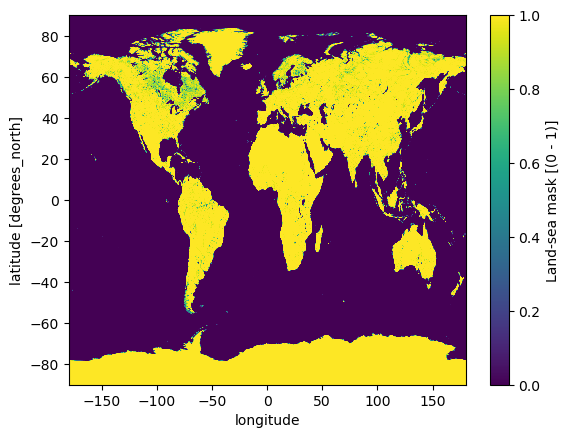

In [ ]:
#Vizualize land and sea mask. Only land data points will be used to train the models
ds['lsm'][:,:].plot()

In [ ]:
#define the coordinates that you want to train over (select None to select all)
lat1 = 80
lat2 = -40
long1 = -30
long2 = None

In [ ]:
#create a slice of the origninal dataset to train on by using the latitude and longitude above
ds1 = ds.sel(latitude=slice(lat1, lat2), longitude=slice(long1, long2))
ds1.sizes

Frozen({'latitude': 480, 'longitude': 840, 'time': 966})

In [ ]:
#Split dataset into training and validation sets (70/30 split to reduce training time)
time_slice = ds['time'].values[7*len(ds['time']) // 10]
ds2 = ds1.sel(time=slice(None, time_slice)) #testing
ds3 = ds1.sel(time=slice(time_slice + 1, None)) #validation

In [ ]:
frame_size = ds2.sizes['latitude'] * ds2.sizes['longitude'] #compute the number of points in a single frame
print(ds2.sizes)
print(ds3.sizes)
print(frame_size)

Frozen({'latitude': 480, 'longitude': 840, 'time': 677})
Frozen({'latitude': 480, 'longitude': 840, 'time': 289})
403200


In [ ]:
#Combine data across 2 year intervals to reduce training time.
#This also improves model performance since the number of burned areas within a short interval of time may be very sparse
resample_period = "2YE"
ds2 = ds2.resample(time=resample_period).mean()
ds3 = ds3.resample(time=resample_period).mean()
print(ds2.sizes)
print(ds3.sizes)

Frozen({'time': 8, 'latitude': 480, 'longitude': 840})
Frozen({'time': 4, 'latitude': 480, 'longitude': 840})


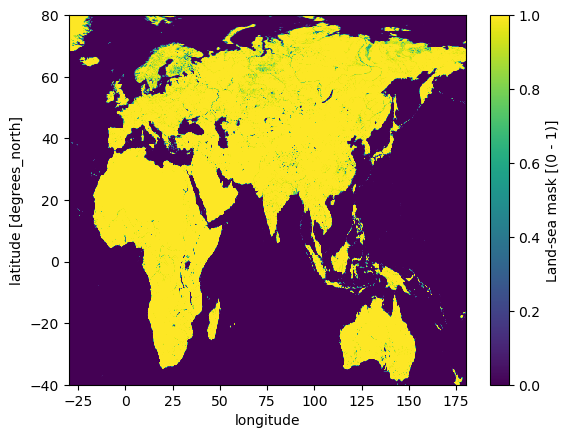

In [ ]:
#Visualize the area of land that will be trained on
ds1['lsm'][:, :].plot()

In [ ]:
#reshape the land/sea mask so that it can be used for matrix multiplication later
mask = ds1['lsm'][:, :]
mask = mask.values.reshape(-1)
mask.shape

(403200,)

In [ ]:
#Convert all values above 0.8 to 1 to indicate a land value
land_mask = (mask > 0.8).astype(int)
land_mask.shape

(403200,)

In [ ]:
ds2['gwis_ba'].values.shape

(8, 480, 840)

In [ ]:
#Repeat the land/sea mask vaues n times since n frames of data will be used to train
n =ds2.sizes['time'] -1 #subtract 1 from the number of frames because we will offset the target frames by one unit of time. i.e. the models will predict wildfires for 2 years into the future given current data
total_land_mask = np.repeat(a=land_mask, repeats=n, axis=0)
total_land_mask.shape

(2822400,)

In [ ]:
#add or remove features from the mode here
a = ds2['mslp'].values.reshape(-1, 1)
b = ds2['tp'].values.reshape(-1, 1)
c = ds2['vpd'].values.reshape(-1, 1)
d = ds2['sst'].values.reshape(-1, 1)
e = ds2['t2m_mean'].values.reshape(-1, 1)
f = ds2['ssrd'].values.reshape(-1, 1)
g = ds2['swvl1'].values.reshape(-1, 1)
h = ds2['lst_day'].values.reshape(-1, 1)
i = ds2['ndvi'].values.reshape(-1, 1)
j = ds2['pop_dens'].values.reshape(-1, 1)

#Create a np array of input feature columns
joined = np.hstack((a, b, c, d, e, f, g, h, i, j))
joined.shape



(3225600, 10)

# Data Exploration

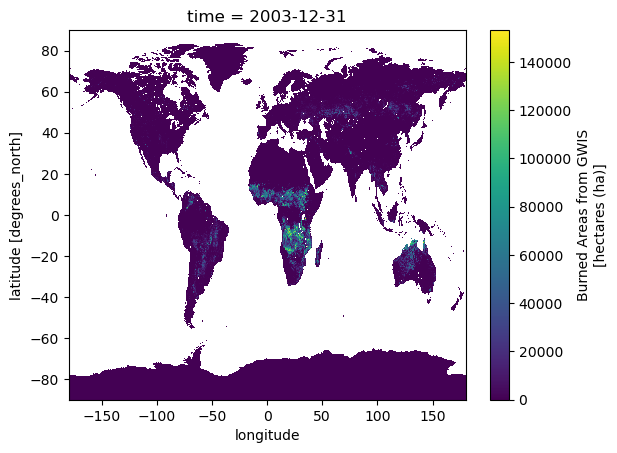

In [ ]:
#Vizualization of an original sample frame showing bured areas in the entire world
ds['gwis_ba'].resample(time=resample_period).sum()[1, :, :].where(ds['lsm']>0.8).plot()

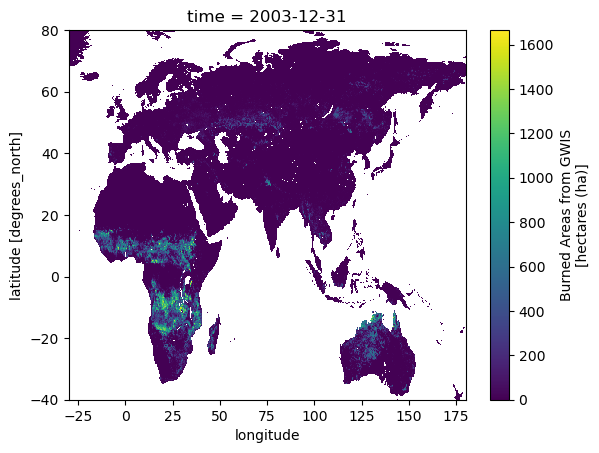

In [ ]:
#plotting one sample of wildfare data that will be used during training
ds2['gwis_ba'][1, :, :].where(ds['lsm']>0.8).plot()

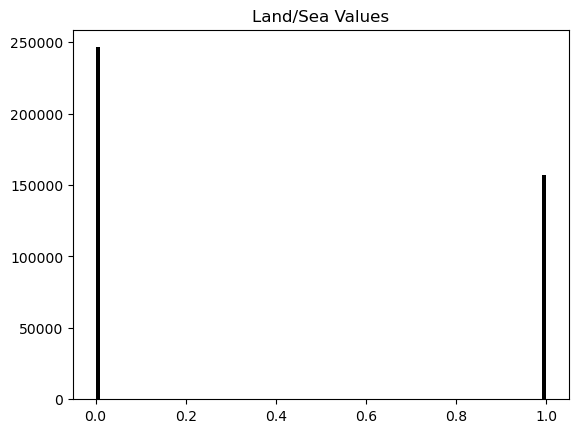

In [ ]:
#Distribution of land and sea values
plt.hist(land_mask, bins = 100,color="black")
plt.title("Land/Sea Values")
plt.show()

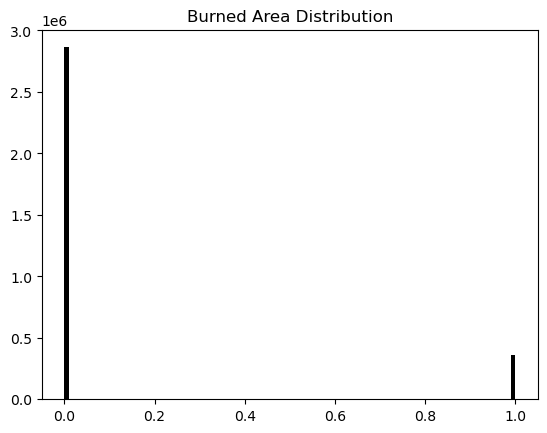

In [ ]:
#Distribution of burned area mask values
burned_area_mask = (ds2['gwis_ba'].values.reshape(-1) > 0.9).astype(int)
plt.hist(burned_area_mask, bins = 100, color="black")
plt.title("Burned Area Distribution")
plt.show()

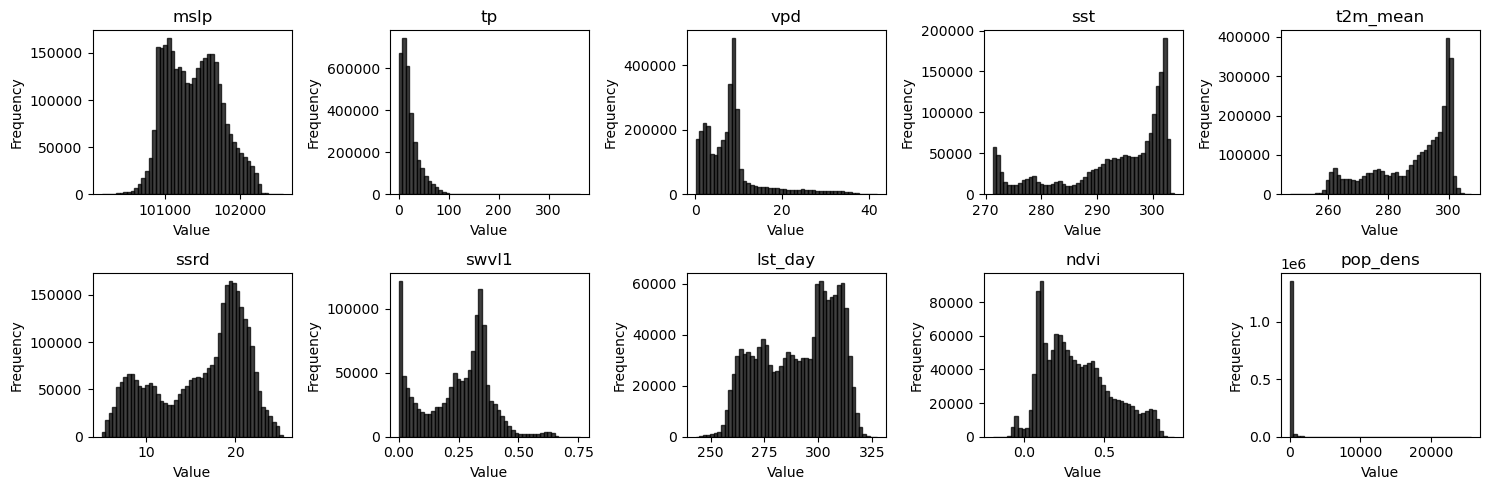

In [ ]:
#Plot Feature Histograms
feature_list = [a, b, c, d, e, f, g, h, i, j]
feature_names = ['mslp', 'tp', 'vpd', 'sst', 't2m_mean', 'ssrd', 'swvl1', 'lst_day', 'ndvi', 'pop_dens']
fig, axs = plt.subplots(2, 5, figsize=(15, 5))
count = 0

for i in range(2):
    for j in range(5):
        axs[i, j].hist(feature_list[count], bins=50, alpha=0.75, edgecolor='black', color="black")
        axs[i, j].set_title(feature_names[count])
        axs[i, j].set_xlabel('Value')
        axs[i, j].set_ylabel('Frequency')
        count += 1

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Data Preparation

In [ ]:
#Create the freature and target arrays for training.
#Both X and y and offset by one frame so that the model predicts wildfires 8 days
#into the future given the current input variables
try:
    X = joined[:-frame_size]
    y = burned_area_mask[frame_size:]
except KeyError as e:
    print(f"Error accessing data variables: {e}")
    raise

# Flatten the features if they have more than 2 dimensions
if len(X.shape) > 2:
    X = X.reshape( -1, 1)

# if len(y.shape) > 1:
#     y = y.reshape( -1)

# Check if X is 2D and y is 1D
# assert len(X.shape) == 2, f"Expected 2D features array, got {X.shape}"
# assert len(y.shape) == 1, f"Expected 1D labels array, got {y.shape}"

In [ ]:
#print the input and target array sizes to ensue that the rows match
print(X.shape)
print(y.shape)

(2822400, 10)
(2822400,)


In [ ]:
#Remove all sea values from input and target arrays so that the model only trains on land values
X = X[total_land_mask==1]
y = y[total_land_mask==1]

In [ ]:
#Replace Nan's with 0's
X = np.nan_to_num(X, nan=0.0)
y = np.nan_to_num(y, nan=0.0)


In [ ]:
#print the input and target array sizes to ensue that the rows match
print(X.shape)
print(y.shape)

(1097530, 10)
(1097530,)


In [ ]:
# Split data into training and testing sets using 80/20 split
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
except Exception as e:
    print(f"Error splitting data: {e}")
    raise

# Model Training

## Logistic Regression

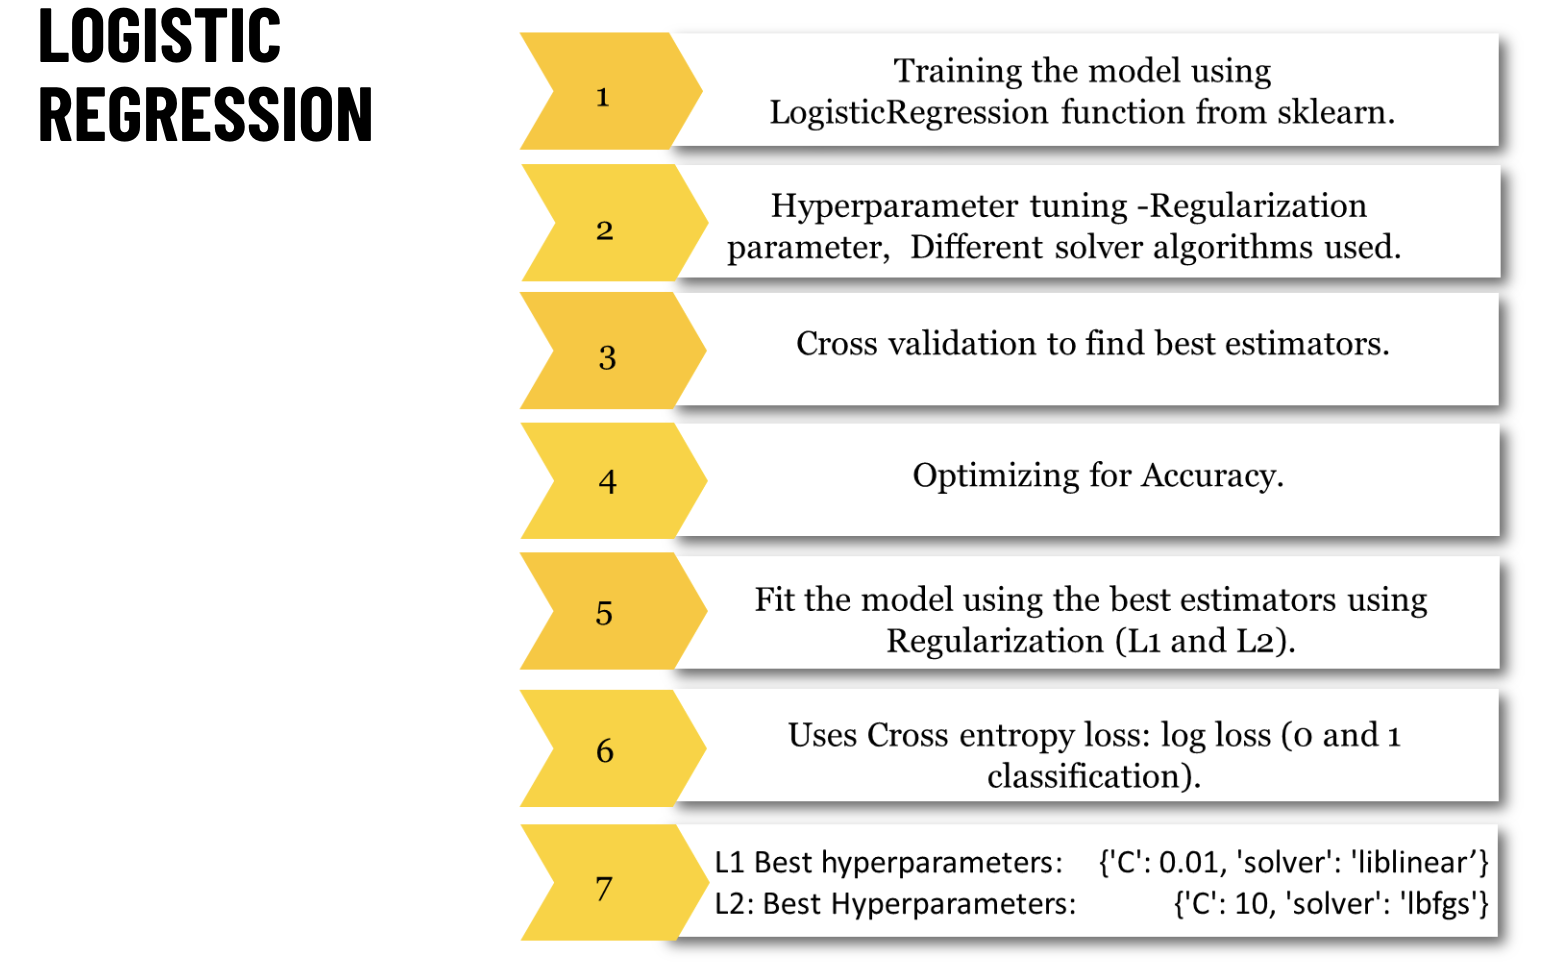

### Train L2 Model

In [ ]:
# Initialize and train the logistic regression model using l2 regularization
model_lr = LogisticRegression(max_iter=1000, penalty='l2')

# Define the training parameters and their values to be tuned
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Choices for the regulaization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  # Choices for the solver
}

try:
   grid_search = GridSearchCV(model_lr, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1) #Get the best regularization parameter and solver using 2-fold CV
   grid_search.fit(X_train, y_train)
   model_lr = grid_search.best_estimator_ #Get best training parameters
   model_lr_l2 = model_lr
   print("Best Hyperparameters:", grid_search.best_params_)
except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

In [ ]:
#Print model coeficients
#this shows the increase in the log(odds of wildfire) for every unit gained in each input variable
#l2
#Coefficients correspond to the following variable order: ['mslp', 'tp', 'vpd', 'sst', 't2m_mean', 'ssrd', 'swvl1', 'lst_day', 'ndvi', 'pop_dens']
model_lr.coef_[0]

array([-2.20083657e-04, -1.93090617e-02, -6.34111994e-02, -3.71488982e-02,
        4.39135751e-02,  5.52522980e-02,  2.45953000e+00,  2.54475501e-02,
        2.89652532e+00, -9.33349594e-04])

### L2 Model Performance

Model saved to /var/folders/9t/ywq9gg3s4zbgn2zw5tfskbv00000gn/T/tmpco_tmknk.joblib
Accuracy: 0.9108
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    194777
           1       0.67      0.41      0.51     24729

    accuracy                           0.91    219506
   macro avg       0.80      0.69      0.73    219506
weighted avg       0.90      0.91      0.90    219506

Confusion Matrix:
[[189796   4981]
 [ 14590  10139]]


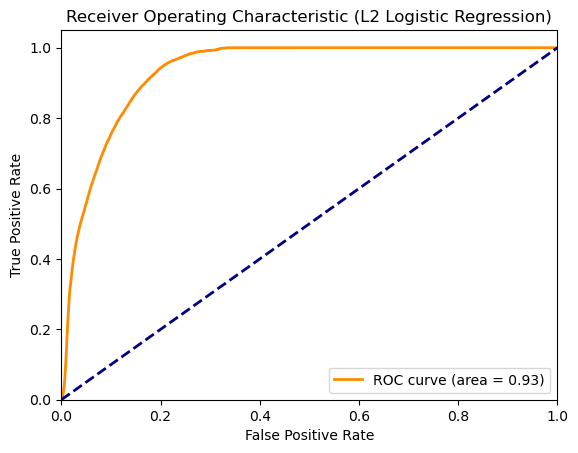

In [ ]:
# Save the trained model to a temporary file
try:
    model_filename = tempfile.mktemp(suffix='.joblib')
    joblib.dump(model_lr, model_filename)
    print(f"Model saved to {model_filename}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")
    raise

# Make predictions on the test set
try:
    y_pred = model_lr_l2.predict(X_test)
    y_prob = model_lr_l2.predict_proba(X_test)[:, 1]

except Exception as e:
    print(f"An error occurred during prediction: {e}")
    raise

# Evaluate the model
try:


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (L2 Logistic Regression)')
    plt.legend(loc="lower right")
    plt.show()


except Exception as e:
    print(f"An error occurred during evaluation: {e}")
    raise


### Train L1 Model

In [ ]:
# Initialize and train the logistic regression model using l1 regularization
model_lr = LogisticRegression(max_iter=1000, penalty='l1')

# Define the training parameters and their values to be tuned
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Choices for regularization parameter
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']  # choices for the solver
}

try:
   grid_search = GridSearchCV(model_lr, param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=-1) #Get best regularization parameter and solver by using 2-fold CV
   grid_search.fit(X_train, y_train)
   model_lr = grid_search.best_estimator_ #Get the best training parameters
   model_lr_l1 = model_lr
   print("Best Hyperparameters:", grid_search.best_params_)

except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

In [ ]:
#Print model coeficients
#this shows the increase in the log(odds of wildfire) for every unit gained in each input variable
#l1
#Coefficients correspond to the following variable order: ['mslp', 'tp', 'vpd', 'sst', 't2m_mean', 'ssrd', 'swvl1', 'lst_day', 'ndvi', 'pop_dens']
model_lr.coef_[0]

array([-2.03355505e-04, -4.07821012e-02, -4.08803816e-02, -7.16443243e-03,
        4.87331791e-02,  1.11467015e-01,  4.98700317e+00,  8.83780964e-03,
        3.74716368e+00, -6.89467088e-04])

### L1 Model Performance

Model saved to /var/folders/9t/ywq9gg3s4zbgn2zw5tfskbv00000gn/T/tmpltapku6j.joblib
Accuracy: 0.9129
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95    194777
           1       0.68      0.43      0.53     24729

    accuracy                           0.91    219506
   macro avg       0.80      0.70      0.74    219506
weighted avg       0.90      0.91      0.90    219506

Confusion Matrix:
[[189747   5030]
 [ 14095  10634]]


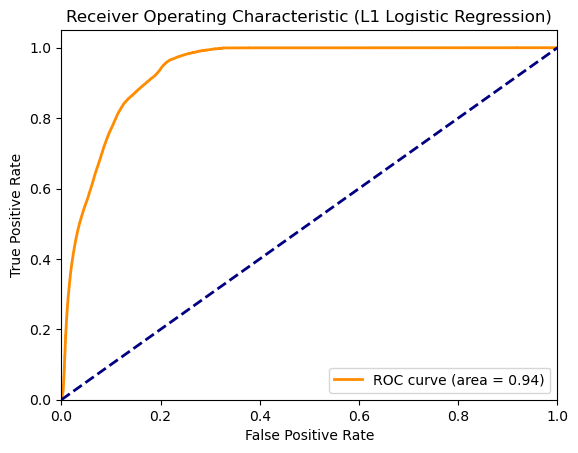

In [ ]:
# Save the trained model to a temporary file
try:
    model_filename = tempfile.mktemp(suffix='.joblib')
    joblib.dump(model_lr, model_filename)
    print(f"Model saved to {model_filename}")
except Exception as e:
    print(f"An error occurred while saving the model: {e}")
    raise

# Make predictions on the test set
try:
    y_pred = model_lr_l1.predict(X_test)
    y_prob = model_lr_l1.predict_proba(X_test)[:, 1]

except Exception as e:
    print(f"An error occurred during prediction: {e}")
    raise

# Evaluate the model
try:


    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (L1 Logistic Regression)')
    plt.legend(loc="lower right")
    plt.show()


except Exception as e:
    print(f"An error occurred during evaluation: {e}")
    raise


 Good Models: Logistic Regression (both L1 and L2) with AUCs around 0.94 and 0.93 for L1 and L2 respectively, indicating strong but not perfect performance.

## Random Forest

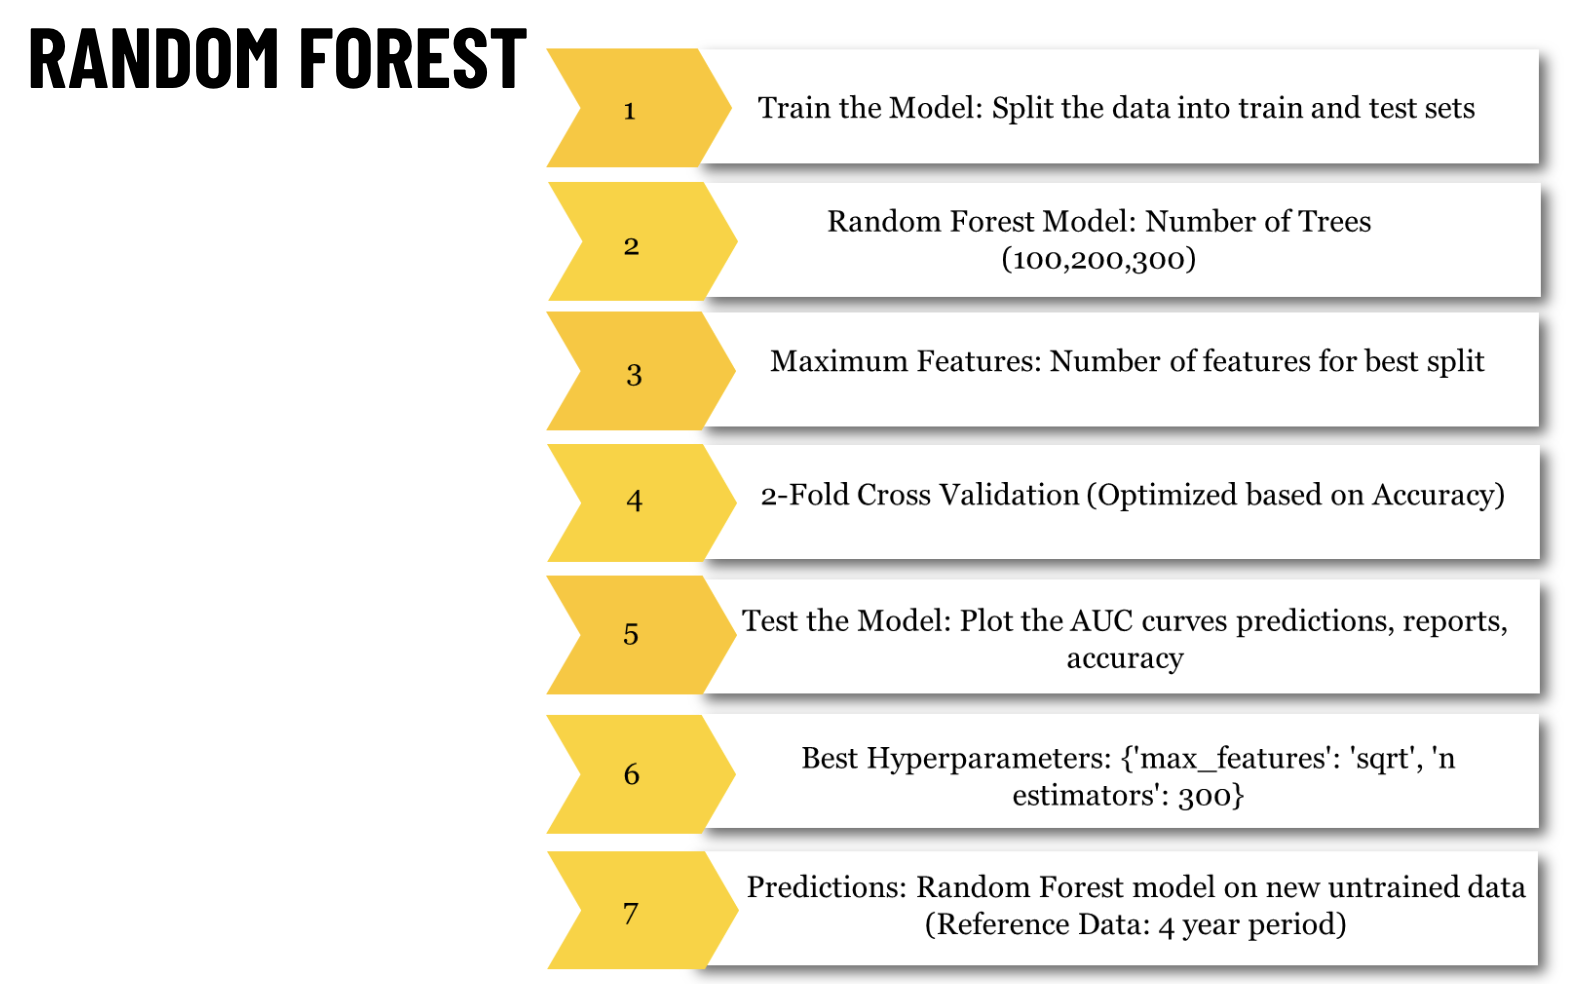

### Train Model

In [ ]:
# Initialize and train the logistic regression model
model_rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],  # Choices for number of trees (estimators)
    'max_features': ['auto', 'sqrt', 'log2'],  # Choices for max features to consider at each split
}

try:
    grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2, n_jobs=-1) #Get the best training parameters using 2-fold CV
    grid_search.fit(X_train, y_train)
    model_rf = grid_search.best_estimator_ # Get the best training parameters
    print("Best Hyperparameters:", grid_search.best_params_)
except Exception as e:
    print(f"An error occurred during model training: {e}")
    raise

In [ ]:
#Feature Importances
model_rf.feature_importances_

array([0.06003288, 0.08247606, 0.10523371, 0.02029152, 0.08107698,
       0.09017826, 0.13207098, 0.12653744, 0.2029214 , 0.09918077])

### Model Performance

Accuracy: 0.9603
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    194777
           1       0.86      0.77      0.81     24729

    accuracy                           0.96    219506
   macro avg       0.92      0.88      0.90    219506
weighted avg       0.96      0.96      0.96    219506

Confusion Matrix:
[[191748   3029]
 [  5682  19047]]


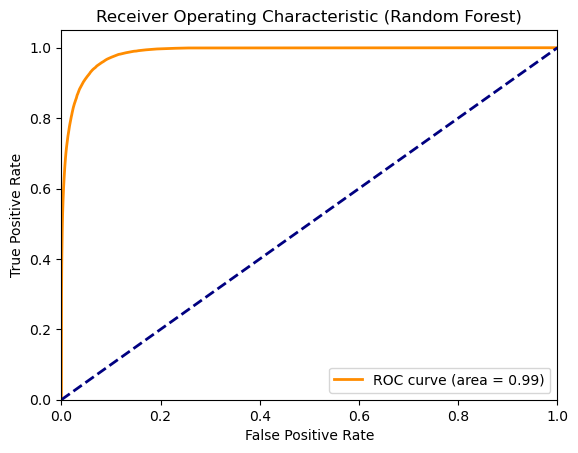

In [ ]:
# Make predictions on the test set
try:
    y_pred = model_rf.predict(X_test)
    y_prob = model_rf.predict_proba(X_test)[:, 1]

except Exception as e:
    print(f"An error occurred during prediction: {e}")
    raise

# Evaluate the model
try:
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Random Forest)')
    plt.legend(loc="lower right")
    plt.show()

except Exception as e:
    print(f"An error occurred during evaluation: {e}")
    raise

Best Model: Random Forest, with an AUC of 0.99, indicating near-perfect separability and confirming its superior performance for wildfire prediction

## Logistic Regression and Random Forest Predictions

In [ ]:
#Create validation data
validation = ds3
validation.sizes['time']

4

In [ ]:
import random

#generate a random sample from the validation data and plot
rand = random.randint(1, validation.sizes['time']-1)
sample = validation.where(validation['lsm'][:,:]>0.8)


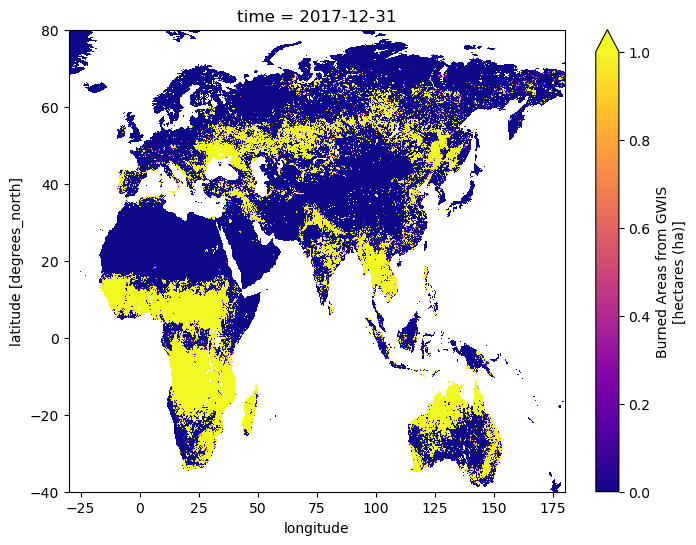

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
sample['gwis_ba'][rand, :, :].plot(cmap="plasma", vmax = 1) #get validation targets

In [ ]:
sample['gwis_ba'][rand, :, :].shape

(480, 840)

In [ ]:
y_val = (sample['gwis_ba'][rand,: , :].values.reshape(-1) > 0.9).astype(int)
#plt.hist(y_val, bins = 100)
#plt.show()

In [ ]:
#input validation set
previous_sample = rand -1
a1 = sample['mslp'][previous_sample, :, :].values.reshape(-1, 1)
b1 = sample['tp'][previous_sample, :, :].values.reshape(-1, 1)
c1 = sample['vpd'][previous_sample, :, :].values.reshape(-1, 1)
d1 = sample['sst'][previous_sample, :, :].values.reshape(-1, 1)
e1 = sample['t2m_mean'][previous_sample, :, :].values.reshape(-1, 1)
f1 = sample['ssrd'][previous_sample, :, :].values.reshape(-1, 1)
g1 = sample['swvl1'][previous_sample, :, :].values.reshape(-1, 1)
h1 = sample['lst_day'][previous_sample, :, :].values.reshape(-1, 1)
i1 = sample['ndvi'][previous_sample, :, :].values.reshape(-1, 1)
j1 = sample['pop_dens'][previous_sample, :, :].values.reshape(-1, 1)



X_val = np.hstack((a1, b1, c1, d1, e1, f1, g1, h1, i1, j1))

In [ ]:

X_val = np.nan_to_num(X_val, nan=0.0)
y_val = np.nan_to_num(y_val, nan=0.0)


In [ ]:
print(f"Original Shape: {sample.sizes}")
print(f"output: {y_val.shape}")
print(f"Input: {X_val.shape}")

Original Shape: Frozen({'time': 4, 'latitude': 480, 'longitude': 840})
output: (403200,)
Input: (403200, 10)


In [ ]:
y_val_pred_lr_l1 = model_lr_l1.predict(X_val)
y_val_pred_lr_l2 = model_lr_l2.predict(X_val)
y_val_pred_rf = model_rf.predict(X_val)

In [ ]:
xarr_lr_l1 = y_val_pred_lr_l1.reshape(sample.sizes['latitude'], sample.sizes['longitude'])
xarr_lr_l2 = y_val_pred_lr_l2.reshape(sample.sizes['latitude'], sample.sizes['longitude'])
xarr_rf = y_val_pred_rf.reshape(sample.sizes['latitude'], sample.sizes['longitude'])

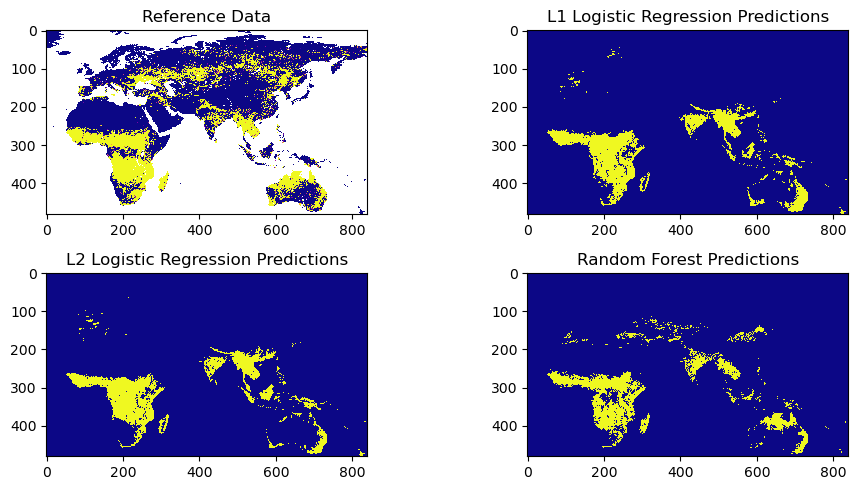

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
# Plot the first image on the first subplot
im0 = ax[0, 0].imshow(sample['gwis_ba'][rand, :, :], cmap='plasma', interpolation='none', vmax = 1)
ax[0, 0].set_title('Reference Data')
#fig.colorbar(im0, ax=ax[0], orientation='vertical')

im1 = ax[0, 1].imshow(xarr_lr_l1, cmap='plasma', interpolation='none')
ax[0, 1].set_title('L1 Logistic Regression Predictions')
#fig.colorbar(im2, ax=ax[1], orientation='vertical')

im2 = ax[1, 0].imshow(xarr_lr_l2, cmap='plasma', interpolation='none')
ax[1, 0].set_title('L2 Logistic Regression Predictions')
#fig.colorbar(im2, ax=ax[1], orientation='vertical')

# Plot the second image on the second subplot
im3 = ax[1, 1].imshow(xarr_rf, cmap='plasma', interpolation='none')
ax[1, 1].set_title('Random Forest Predictions')
#fig.colorbar(im3, ax=ax[2], orientation='vertical')

plt.tight_layout()

plt.show()

##Neural Networks

### Feed Forward Neural Network

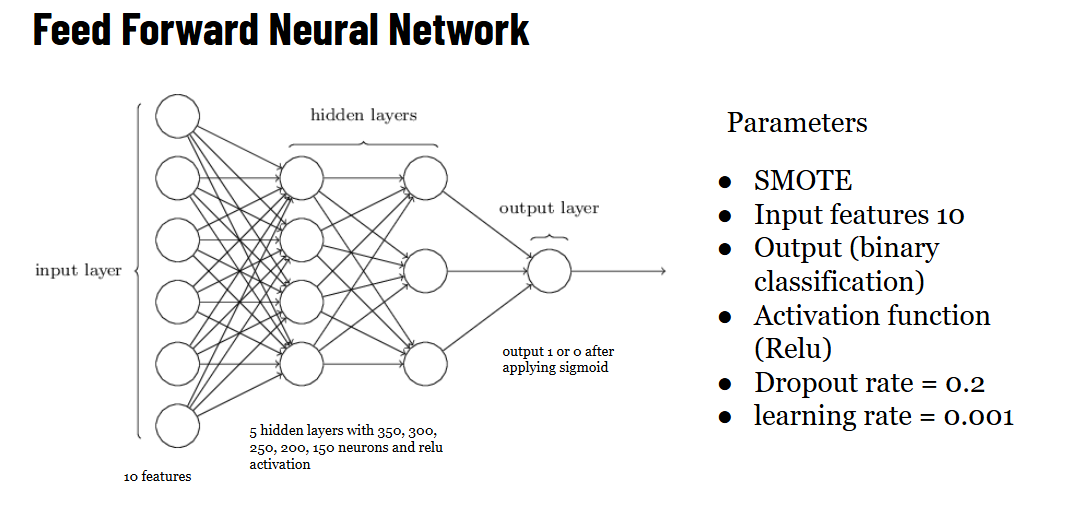

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Handle NaN and zero values
def handle_nan_and_zeros(data):
    data = np.nan_to_num(data, nan=0.0, posinf=1e6, neginf=-1e6)
    return data

selected_vars = feature_names
data_tensors = []
for var in selected_vars:
    var_data = ds2[var].values # Fetch variable data from dataset
    var_data = handle_nan_and_zeros(var_data)  # Handle NaNs and zeros
    var_data = var_data.transpose(1, 0, 2)  # Reshape to (time, latitude, longitude)
    data_tensors.append(var_data)

# Combine data tensors into one tensor
data_combined = np.stack(data_tensors, axis=-1)  # Shape: (time, latitude, longitude, num_vars)
data_combined = data_combined.reshape(-1, data_combined.shape[-1])  # Flatten to 2D

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_combined)

# Reshape back to the original shape after normalization
data_normalized = data_normalized.reshape(-1, ds2.sizes['latitude'], ds2.sizes['longitude'], len(selected_vars))  # Shape: (time, latitude, longitude, num_vars)
data_normalized = torch.tensor(data_normalized, dtype=torch.float32)

# Assuming 'gwis_ba' is the target variable in the dataset
targets = ds2['gwis_ba'].values # Shape: (time, latitude, longitude)
targets = handle_nan_and_zeros(targets)  # Handle NaNs and zeros
targets = (targets.reshape(-1) > 0).astype(int)  # Convert to binary values
targets = torch.tensor(targets, dtype=torch.float32)

num_samples = data_normalized.shape[0] * data_normalized.shape[1] * data_normalized.shape[2]
data_normalized_flat = data_normalized.reshape(num_samples, data_normalized.shape[-1])  # Shape: (num_samples, num_vars)
targets_flat = targets.reshape(num_samples)  # Shape: (num_samples,)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_normalized_flat.cpu().numpy(), targets_flat.cpu().numpy())

# Split the resampled data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert back to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Number of epochs
num_epochs = 3
# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, activation_function, dropout):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dims[0])
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_dims[i], hidden_dims[i+1]) for i in range(len(hidden_dims)-1)])
        self.dropout = nn.Dropout(dropout)
        self.activation_function = activation_function
        self.fc2 = nn.Linear(hidden_dims[-1], 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.activation_function(x)
        x = self.dropout(x)
        for layer in self.hidden_layers:
            x = layer(x)
            x = self.activation_function(x)
            x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Model parameters
input_dim = data_normalized_flat.shape[-1]  # Number of input features (num_vars)
hidden_dims = [350, 300, 250, 200, 150]  # Define the number of units in each hidden layer
dropout = 0.2
activation_function = nn.ReLU()  # Example activation function, you can choose others like nn.Tanh(), nn.Sigmoid(), etc.
lr = 0.001

activation_function = nn.ReLU()
# Initialize the BiLSTM model
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model = model = FeedForwardNN(input_dim, hidden_dims, activation_function, dropout).to(device)

class_counts = torch.tensor([len(y_train) - y_train.sum(), y_train.sum()])
class_weights = class_counts.sum() / (2.0 * class_counts)
pos_weight = class_weights[1] / class_weights[0]

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)


Epoch [1/3], Average Loss: 0.6522
Epoch [2/3], Average Loss: 0.6411
Epoch [3/3], Average Loss: 0.6379


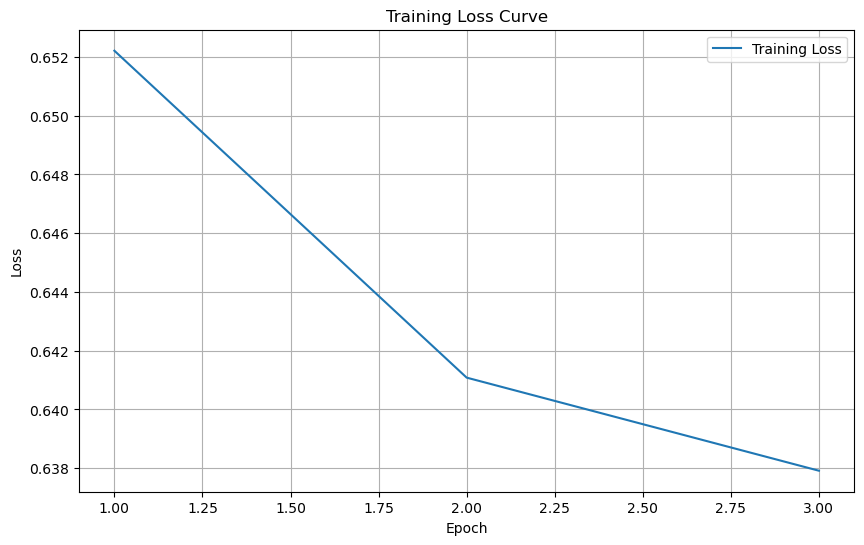

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Ensure the model is in training mode
model.train()

# Lists to store losses
train_losses = []

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)

        # Check for NaN or Inf values in inputs and targets
        if torch.isnan(inputs).any() or torch.isnan(targets).any() or torch.isinf(inputs).any() or torch.isinf(targets).any():
            print(f'NaN or Inf values detected in epoch {epoch+1}, batch {batch_idx+1}. Skipping batch...')
            continue  # Skip this batch

        # Ensure inputs are of type float32
        inputs = inputs.float()

        # Forward pass
        outputs = model(inputs)

        # Ensure outputs and targets have compatible shapes
        outputs = outputs.squeeze()
        targets = targets.squeeze()

        # Compute loss
        loss = criterion(outputs, targets)

        # Handle NaN or Inf loss
        if torch.isnan(loss) or torch.isinf(loss):
            print(f'NaN or Inf loss encountered in epoch {epoch+1}, batch {batch_idx+1}')
            continue  # Skip this batch

        # Backward pass and optimize
        loss.backward()

        # Apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        epoch_loss += loss.item()

    # Average epoch loss
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Evaluate on validation set
model.eval()
val_loss = 0.0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()
        outputs = model(inputs)# Perform the forward pass to get model predictions.
        outputs = outputs.squeeze()# Remove any extra dimensions from the outputs.
        targets = targets.squeeze()
        loss = criterion(outputs, targets)# Calculate the loss between the predicted outputs and the actual targets.
        val_loss += loss.item()# Accumulate the loss over all batches.

avg_val_loss = val_loss / len(val_loader)
print(f'Validation Loss: {avg_val_loss:.4f}')


Validation Loss: 0.6329


Accuracy: 0.6977
Precision: 0.7362
Recall: 0.6164
F1-score: 0.6710

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72    282054
         1.0       0.74      0.62      0.67    282162

    accuracy                           0.70    564216
   macro avg       0.70      0.70      0.70    564216
weighted avg       0.70      0.70      0.70    564216



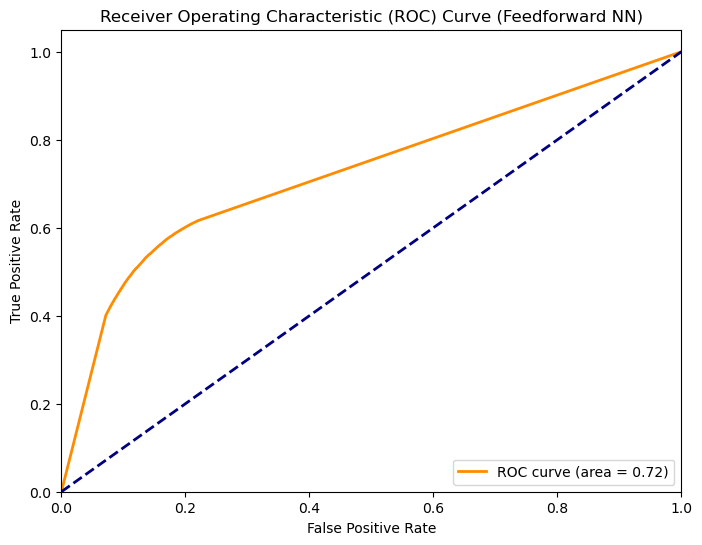

ROC curve data exported to roc_curve_data.csv

Confusion Matrix:
[[219734  62320]
 [108243 173919]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, confusion_matrix
import seaborn as sns
import pandas as pd

# Ensure the model is in evaluation mode
model.eval()

all_outputs = []
all_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()# Ensure the inputs are in float format.
        outputs = model(inputs)# Perform the forward pass to get model predictions.
        all_outputs.extend(outputs.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Convert lists to numpy arrays
all_outputs = np.array(all_outputs).squeeze()
all_targets = np.array(all_targets).squeeze()

# Apply sigmoid to get probabilities
all_probs = torch.sigmoid(torch.tensor(all_outputs)).numpy()

# Convert probabilities to binary predictions
all_preds = np.round(all_probs)

# Calculate metrics
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds)
recall = recall_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)

# Print metrics and classification report
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print("\nClassification Report:")
print(classification_report(all_targets, all_preds))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(all_targets, all_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Feedforward NN)')
plt.legend(loc='lower right')
plt.show()

# Optional: Save ROC curve data if needed
roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
roc_data.to_csv('roc_curve_data.csv', index=False)
print("ROC curve data exported to roc_curve_data.csv")

# Compute confusion matrix
conf_matrix = confusion_matrix(all_targets, all_preds)

# Print confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

Classification report

The model has a moderate performance with an overall accuracy of 70%.

For class 0 (No Wildfire), the recall is higher than the precision, indicating that the model is good at identifying true negatives but also has some false positives.

For class 1 (Wildfire), the precision is higher than the recall, indicating that the model is good at identifying true positives but misses some actual positives.

The F1-scores for both classes are similar, showing a balanced performance between precision and recall for each class.

The macro and weighted averages are identical in this case, reflecting a balanced dataset where both classes have almost equal support.

ROC curve

The model demonstrates moderate performance in distinguishing between classes, as indicated by the AUC score of 0.72. While the model shows some ability to correctly classify instances, its performance is not exceptional. Additionally, the ROC curve's shape suggests opportunities for improvement as there's a noticeable gap between the ideal curve and the model's actual performance.

## LSTM

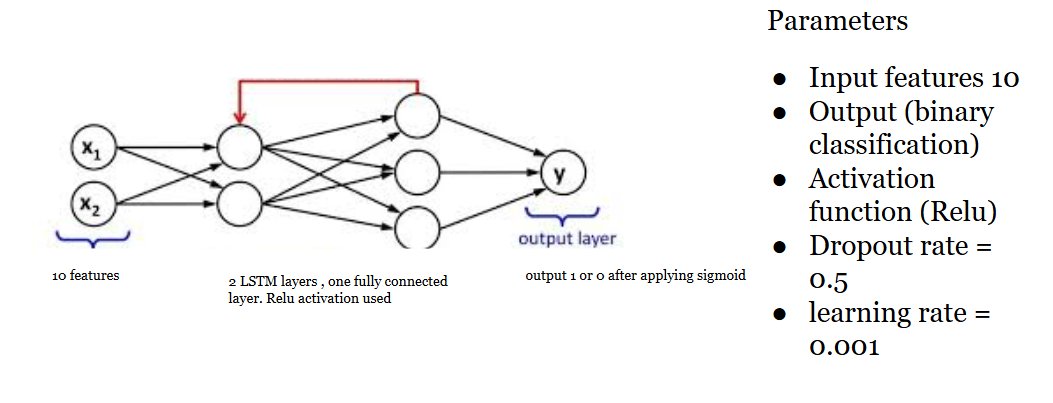

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

# Handle NaN and zero values
def handle_nan_and_zeros(data):
    data = np.nan_to_num(data, nan=0.0, posinf=1e6, neginf=-1e6)
    return data

selected_vars = ['mslp', 'tp', 'vpd', 'sst', 't2m_mean', 'ssrd', 'swvl1', 'lst_day', 'ndvi', 'pop_dens']
data_tensors = []
for var in selected_vars:
    var_data = ds2[var].values  # Fetch variable data from dataset
    var_data = handle_nan_and_zeros(var_data)  # Handle NaNs and zeros
    var_data = var_data.transpose(1, 0, 2)  # Reshape to (time, latitude, longitude)
    data_tensors.append(var_data)

# Combine data tensors into one tensor
data_combined = np.stack(data_tensors, axis=-1)  # Shape: (time, latitude, longitude, num_vars)
data_combined = data_combined.reshape(-1, data_combined.shape[-1])  # Flatten to 2D

# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_combined)

# Reshape back to the original shape after normalization
data_normalized = data_normalized.reshape(-1, ds2.sizes['latitude'], ds2.sizes['longitude'], len(selected_vars))  # Shape: (time, latitude, longitude, num_vars)
data_normalized = torch.tensor(data_normalized, dtype=torch.float32)

# Assuming 'gwis_ba' is the target variable in the dataset
targets = ds2['gwis_ba'].values  # Shape: (time, latitude, longitude)
targets = handle_nan_and_zeros(targets)  # Handle NaNs and zeros
targets = (targets.reshape(-1) > 0).astype(int)  # Convert to binary values
targets = torch.tensor(targets, dtype=torch.float32)

num_samples = data_normalized.shape[0] * data_normalized.shape[1] * data_normalized.shape[2]
data_normalized_flat = data_normalized.reshape(num_samples, -1, data_normalized.shape[-1])  # Shape: (num_samples, num_vars)
targets_flat = targets.reshape(num_samples, -1)  # Shape: (num_samples,)

In [ ]:
import matplotlib.pyplot as plt

# Split dataset into training, validation, and testing
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(data_normalized_flat, targets_flat, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

train_dataset = TensorDataset(torch.Tensor(X_train), torch.Tensor(y_train))
val_dataset = TensorDataset(torch.Tensor(X_val), torch.Tensor(y_val))
test_dataset = TensorDataset(torch.Tensor(X_test), torch.Tensor(y_test))

# Number of epochs
num_epochs = 3

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Define LSTM model with ReLU activation after LSTM layer and Sigmoid activation at the output
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # Take the output from the last time step
        out = self.relu(out)
        out = self.fc(out)
        out = self.sigmoid(out)  # Apply sigmoid activation
        return out

# Model parameters
input_dim = data_normalized_flat.shape[-1]  # Number of input features (num_vars)
output_dim = 1  # Single output prediction
hidden_dim = 36
num_layers = 2#lstm celss
dropout = 0.5#dropout rate

# Initialize the model
device = torch.device("cpu")
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

torch.autograd.set_detect_anomaly(True)

# Initialize lists to store losses
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        inputs, targets = inputs.to(device), targets.to(device)

        # Check for NaN or Inf values in inputs and targets
        if torch.isnan(inputs).any() or torch.isnan(targets).any() or torch.isinf(inputs).any() or torch.isinf(targets).any():
            print(f'NaN or Inf values detected in epoch {epoch+1}, batch {batch_idx+1}. Skipping batch...')
            continue  # Skip this batch

        # Ensure inputs are of type float32
        inputs = inputs.float()

        # Forward pass
        outputs = model(inputs)

        # Ensure outputs and targets have compatible shapes
        outputs = outputs.squeeze()
        targets = targets.squeeze()

        # Compute loss
        loss = criterion(outputs, targets)

        # Handle NaN or Inf loss
        if torch.isnan(loss) or torch.isinf(loss):
            print(f'NaN or Inf loss encountered in epoch {epoch+1}, batch {batch_idx+1}')
            continue  # Skip this batch

        # Backward pass and optimize
        loss.backward()

        # Apply gradient clipping
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()
        epoch_loss += loss.item()

        # Print progress
        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    # Average epoch loss
    avg_loss = epoch_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')
    train_losses.append(avg_loss)

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            inputs = inputs.float()
            outputs = model(inputs)
            outputs = outputs.squeeze()
            targets = targets.squeeze()
            loss = criterion(outputs, targets)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Validation Loss: {avg_val_loss:.4f}')
    val_losses.append(avg_val_loss)

# Plot learning curves
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.grid(True)
plt.show()

In [ ]:
# Evaluate on validation set
model.eval()
val_loss = 0.0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()# Ensure the inputs are in float format.
        outputs = model(inputs)# Perform the forward pass to get model predictions.
        outputs = outputs.squeeze()# Remove any extra dimensions from the outputs.
        targets = targets.squeeze()
        loss = criterion(outputs, targets)# Calculate the loss between the predicted outputs and the actual targets.
        val_loss += loss.item()# Accumulate the loss over all batches.

avg_val_loss = val_loss / len(val_loader)
print(f'Validation Loss: {avg_val_loss:.4f}')


Validation Loss: 0.3360


Accuracy: 0.1256
Precision: 0.1256
Recall: 1.0000
F1-score: 0.2232

Classification Report:


/opt/anaconda3/envs/MSCI623/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/MSCI623/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/MSCI623/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00    282043
         1.0       0.13      1.00      0.22     40517

    accuracy                           0.13    322560
   macro avg       0.06      0.50      0.11    322560
weighted avg       0.02      0.13      0.03    322560



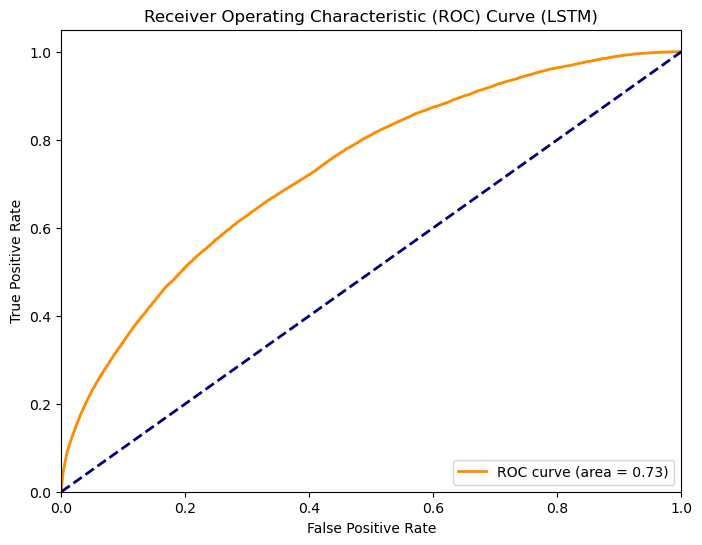

ROC curve data exported to roc_curve_data.csv


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc

# Ensure the model is in evaluation mode
model.eval()

all_outputs = []
all_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        inputs = inputs.float()
        outputs = model(inputs)
        all_outputs.extend(outputs.cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

# Convert lists to numpy arrays
all_outputs = np.array(all_outputs).squeeze()
all_targets = np.array(all_targets).squeeze()

# Apply sigmoid to get probabilities
all_probs = torch.sigmoid(torch.tensor(all_outputs)).numpy()

# Convert probabilities to binary predictions
all_preds = np.round(all_probs)

# Calculate metrics
accuracy = accuracy_score(all_targets, all_preds)
precision = precision_score(all_targets, all_preds)
recall = recall_score(all_targets, all_preds)
f1 = f1_score(all_targets, all_preds)

# Print metrics and classification report
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print("\nClassification Report:")
print(classification_report(all_targets, all_preds))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(all_targets, all_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (LSTM)')
plt.legend(loc='lower right')
plt.show()

# Optional: Save ROC curve data if needed
roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})
roc_data.to_csv('roc_curve_data.csv', index=False)
print("ROC curve data exported to roc_curve_data.csv")


###Classification report

The report shows a significant class imbalance problem. The model performs poorly for class 0, which has a much higher number of instances compared to class 1.

The model identifies all instances of class 1 correctly (recall = 1.00), but it also has many false positives, leading to low precision (0.13).

The model fails completely for class 0, with precision, recall, and F1-score all being 0. This means the model did not correctly predict any instances of class 0.

With an accuracy of 13%, the model is performing poorly overall, correctly predicting a small fraction of the total instances.

###ROC Curve

AUC Score of 0.73 suggests that the model has a moderate ability to distinguish between class 0 and class 1. While not exceptional, it is still a decent result.
The curve is generally upward sloping, indicating that as the false positive rate increases, the true positive rate also increases. However, the curve is not extremely close to the top-left corner, suggesting room for improvement in terms of maximizing true positives while minimizing false positives.

#Results

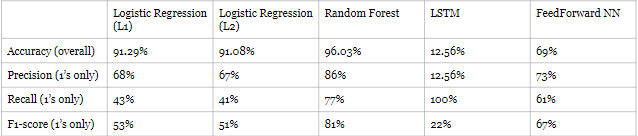

#Analysis based on Metrics
###Random Forest:

Recall: 77%
Precision: 86%
F1-score: 81%
Inference: This model provides a good balance between high recall and precision, making it highly reliable for detecting wildfires without generating too many false alarms.

###LSTM (ReLU):

- Recall: 100%
- Precision: 12.56%
- F1-score: 22%

Inference: While the recall is very high, indicating that it detects most wildfires, the precision is very low. This means it generates a lot of false positives, which might not be practical for resource management.

###FeedForward NN:

- Recall: 61%
- Precision: 73%
- F1-score: 67%
Inference: This model has moderate precision but low recall, meaning it misses a significant number of wildfires, which is not ideal for this application.

###Logistic Regression (L2):

- Recall: 41%
- Precision: 67%
- F1-score: 51%

###Logistic Regression (L1):

- Recall: 43%
- Precision: 68%
- F1-score: 53%

Inference: Similar to FeedForward NN, it has low recall and moderate precision, making it less effective for wildfire prediction.

###Conclusion
Given the importance of detecting as many wildfires as possible while maintaining a reasonable number of false positives:

Best Model: Random Forest is the best choice because it offers a strong balance between high recall and high precision, reflected in its high F1-score. This balance ensures that most wildfires are detected while keeping the number of false positives manageable.

Considerations: Depending on resource availability and the critical nature of missing a wildfire, the LSTM model with its high recall could be considered, but the low precision means many false positives, requiring significant resources to manage.

#Limitations

- Due to limited computational resources, we had to reduce the dataset size, which may have impacted the overall accuracy of our results.

- In future model training, retaining the images in their original format instead of converting them to 1-D tensors could potentially enhance the model's accuracy and performance.

#References

[1] Michail, D., Panagiotou, L.-I., Davalas, C., Prapas, I., Kondylatos, S., Bountos, N. I., & Papoutsis, I. (n.d.). Seasonal Fire Prediction using Spatio-Temporal Deep Neural Networks.

[2] Prapas, I., Ahuja, A., Kondylatos, S., Karasante, I., Panagiotou, E., Alonso, L., Davalas, C., Michail, D., Carvalhais, N., & Papoutsis, I. (n.d.). Deep Learning for Global Wildfire Forecasting.